# Comparing DOS with PyProcar

## Overview

The `pyprocar.dosplot()` function is a powerful tool for visualizing density of states (DOS). One of its key features is that it returns matplotlib `Figure` and `Axes` objects when `show=False`, which enables advanced plotting capabilities including comparing multiple DOS curves on the same plot.

### What dosplot returns

When called with `show=False`, `dosplot()` returns:
- `fig`: A matplotlib Figure object containing the entire plot
- `ax`: A matplotlib Axes object representing the plotting area

### Method for comparing DOS

To compare DOS from different sources, calculations, or components:

1. **First call**: Use `dosplot()` with `show=False` to generate the initial DOS and capture the `fig` and `ax` objects
2. **Subsequent calls**: Pass the `ax` object to additional `dosplot()` calls using the `ax` parameter
3. **Final display**: The last call should have `show=True` to display the combined plot

This approach allows you to overlay multiple DOS from:
- **Different DFT codes** (like VASP and Quantum Espresso)
- **Different spin channels** (spin-up vs spin-down)
- **Different orbital projections** (s, p, d, f orbitals)
- **Different atoms or species** in the same system
- **Different calculation parameters** (k-points, functionals, etc.)

## Benefits of DOS Comparison

Comparing DOS helps you:
- **Validate calculations** across different codes
- **Understand electronic structure** by comparing different components
- **Analyze magnetic properties** by comparing spin channels
- **Study orbital contributions** from different atoms or orbital types
- **Examine convergence** with different computational parameters

## 1. Setup and Data Loading

First, we'll import the necessary libraries and download example data. We'll use both spin-polarized and non-spin-polarized data to demonstrate various DOS comparison techniques.

In [ ]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()

# Download both spin-polarized and non-spin-polarized data
SPIN_POL_PATH = "data/examples/dos/spin-polarized"
NON_SPIN_POL_PATH = "data/examples/dos/non-spin-polarized"

pyprocar.download_from_hf(relpath=SPIN_POL_PATH, output_path=CURRENT_DIR)
pyprocar.download_from_hf(relpath=NON_SPIN_POL_PATH, output_path=CURRENT_DIR)

SPIN_POL_DATA_DIR = CURRENT_DIR / SPIN_POL_PATH
NON_SPIN_POL_DATA_DIR = CURRENT_DIR / NON_SPIN_POL_PATH

print(f"Spin-polarized data: {SPIN_POL_DATA_DIR}")
print(f"Non-spin-polarized data: {NON_SPIN_POL_DATA_DIR}")
print("✅ Data ready for DOS comparison examples!")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\spin-polarized
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\non-spin-polarized
Spin-polarized data: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\spin-polarized
Non-spin-polarized data: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\non-spin-polarized
✅ Data ready for DOS comparison examples!


## 2. Basic DOS Comparison: Spin Channels

Now we'll demonstrate the fundamental DOS comparison technique by comparing spin-up and spin-down channels from the same calculation:

1. **Step 1**: Plot the spin-up DOS with `show=False` to capture the `fig` and `ax` objects
2. **Step 2**: Plot the spin-down DOS using the same `ax` object with `show=True` to display the combined result

This creates a side-by-side comparison of spin channels, which is essential for understanding magnetic properties.

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

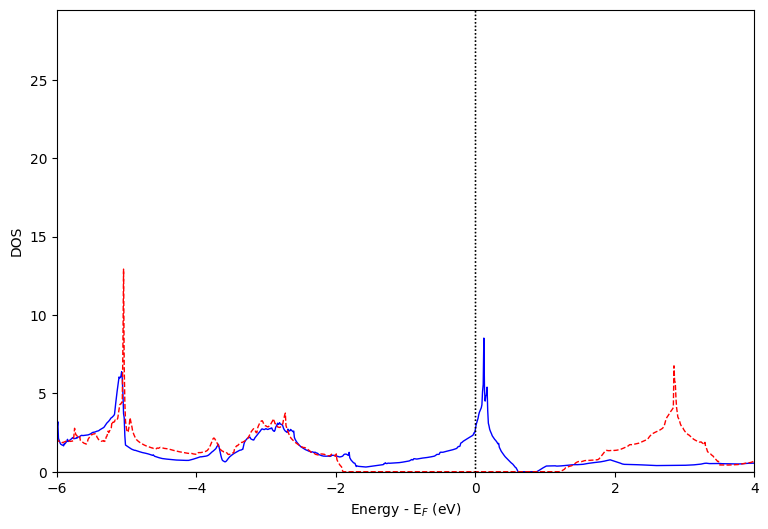

🧲 Spin comparison: Blue = spin-up, Red = spin-down


In [2]:
# Step 1: Plot spin-up DOS and capture fig, ax objects
fig, ax = pyprocar.dosplot(
    code="vasp",
    dirname=SPIN_POL_DATA_DIR,
    mode="plain",
    fermi=5.3017,
    elimit=[-6, 4],
    spins=[0],  # Spin-up channel
    color="blue",
    show=False,  # Don't show yet, capture the axes
)

# Step 2: Plot spin-down DOS on the same axes
pyprocar.dosplot(
    code="vasp",
    dirname=SPIN_POL_DATA_DIR,
    mode="plain",
    fermi=5.3017,
    elimit=[-6, 4],
    spins=[1],  # Spin-down channel
    color="red",
    ax=ax,  # Use the same axes from spin-up plot
    show=True,  # Show the combined plot
)

print("🧲 Spin comparison: Blue = spin-up, Red = spin-down")